# GenAI for Data Teams: Demos


Data teams face several challenges in their work, particularly around data quality, cleaning, skillsets, data variety, and complex business analytics. Ensuring data quality is a fundamental hurdle, as inaccurate or incomplete data can lead to flawed insights and poor decision-making. Data cleaning is often a labor-intensive process, requiring significant effort to identify and correct errors, fill in missing values, and standardize formats. Additionally, the diverse skillsets needed for effective data work, including programming, statistical analysis, and domain knowledge, can be difficult to find and develop within a team. The variety of data types, from structured to unstructured, adds another layer of complexity, necessitating robust methods for integration and analysis. Finally, performing complex business analytics demands advanced techniques and tools to extract actionable insights from large and diverse datasets, making it essential for data teams to continuously adapt and innovate to meet organizational goals.

In [137]:
! pip3 install --upgrade --user google-cloud-aiplatform

In [ ]:
%pip install --upgrade --quiet  langchain langchain-core langchain-google-vertexai langchain_experimental

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [138]:
# Define project information

import sys

PROJECT_ID = "gen-ai-for-data-teams"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: gen-ai-for-data-teams


In [139]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

## Demo 1: Synthetic Data Generation with Vertex AI

In [141]:
!pip install faker
!pip install pandas

In [210]:
import bigframes.pandas as bpd
bpd.options.bigquery.project = "gen-ai-for-data-teams"

In [143]:
from bigframes.ml.llm import GeminiTextGenerator

model = GeminiTextGenerator()

In [ ]:
prompt = """\
Write python code to generate a pandas dataframe based on the requirements:
  Column name: Id, type: string, Description: UUID
  Column name: Name, type: string, Description: German Names
  Column name: Age, type: int
  Column name: Gender, type: string, Description: Inclusive
  Column name: Location, type: string, Description: Cities in Germany

Note:
  - Return the code only, no additional texts or comments
  - Use faker library
  - Generate 100 rows
  - The final dataframe should be named 'result_df'.
"""

df_prompt = bpd.DataFrame({"prompt" : [prompt]})
df_prompt

prompt
0  Write python code to generate a pandas datafra...

[1 rows x 1 columns]

In [144]:
df_result = model.predict(df_prompt)
llm_result = df_result['ml_generate_text_llm_result'].iloc[0]
print(llm_result)

/usr/local/lib/python3.10/dist-packages/bigframes/core/__init__.py:108: PreviewWarning: Interpreting JSON column(s) as StringDtype. This behavior may change in future versions.
  warnings.warn(


```python
import pandas as pd
from faker import Faker

# Initialize faker with German locale
faker_de = Faker('de_DE')

# Generate data
data = {
    'Id': [faker_de.uuid4() for _ in range(100)],
    'Name': [faker_de.name() for _ in range(100)],
    'Age': [faker_de.random_int(min=1, max=100) for _ in range(100)],
    'Gender': [faker_de.random_element(elements=['Male', 'Female', 'Non-binary']) for _ in range(100)],
    'Location': [faker_de.city() for _ in range(100)]
}

# Create dataframe
result_df = pd.DataFrame(data)
```


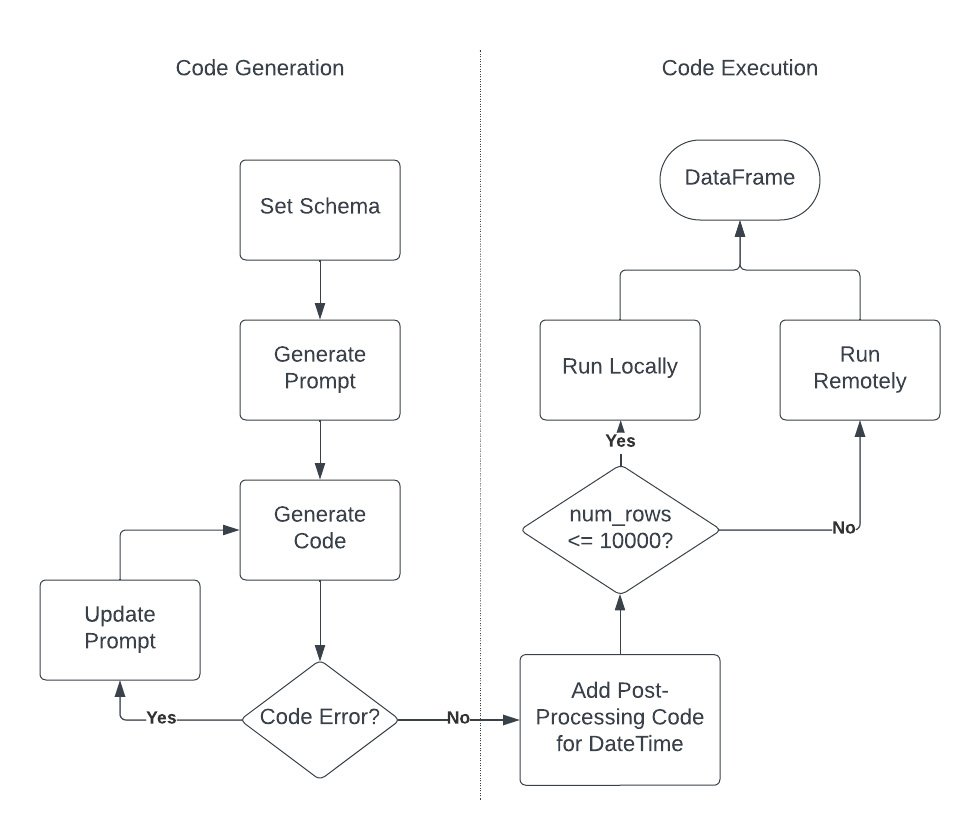

In [145]:
max_tries = 5
for i in range(max_tries):
  # Get LLM generated code
  df_result = model.predict(df_prompt)
  llm_result = df_result['ml_generate_text_llm_result'].iloc[0]

  # Python code comes back as a markdown code block,
  # remove the prefix "```python" and suffix "```"
  code = llm_result[9:-3]
  print(code)

  # Check if the generated code is runnable
  try:
    exec(code)
    break
  except Exception as ex:
    print(ex)
    error_context = f"""
Previous code:
{code}

Had this exception:
{ex}"""

    # Update the prompt to help LLM correct error
    df_prompt["prompt"] += error_context

    # If we have exhausted max tries then stop trying
    if i+1 == max_tries:
      raise Exception("Failed to generate runnable code")

/usr/local/lib/python3.10/dist-packages/bigframes/core/__init__.py:108: PreviewWarning: Interpreting JSON column(s) as StringDtype. This behavior may change in future versions.
  warnings.warn(




import pandas as pd
from faker import Faker

# Initialize Faker with German locale
fake = Faker('de_DE')

# Generate data for 100 rows
data = {'Id': [fake.uuid4() for _ in range(100)],
        'Name': [fake.name() for _ in range(100)],
        'Age': [fake.random_int(0, 100) for _ in range(100)],
        'Gender': [fake.random_element(['Male', 'Female', 'Non-binary', 'Other']) for _ in range(100)],
        'Location': [fake.city() for _ in range(100)]}

# Create pandas DataFrame
result_df = pd.DataFrame(data)




In [146]:
print(code)



import pandas as pd
from faker import Faker

# Initialize Faker with German locale
fake = Faker('de_DE')

# Generate data for 100 rows
data = {'Id': [fake.uuid4() for _ in range(100)],
        'Name': [fake.name() for _ in range(100)],
        'Age': [fake.random_int(0, 100) for _ in range(100)],
        'Gender': [fake.random_element(['Male', 'Female', 'Non-binary', 'Other']) for _ in range(100)],
        'Location': [fake.city() for _ in range(100)]}

# Create pandas DataFrame
result_df = pd.DataFrame(data)




In [147]:
execution_context = {}
exec(code, execution_context)
execution_context.get("result_df")

Id                        Name  Age  \
0   c7b9675a-da9e-49da-9b09-766c3ab780a0           Rosalie Mielcarek   16   
1   5e425f1c-dc6a-42f8-adae-33b5ee121e07          Tomas Sager-Renner   12   
2   9255d7c3-0ebd-499b-a606-d1a8815d159a     Frau Julia Jockel B.Sc.   48   
3   53589912-5dda-4e71-b47f-67d0c50012aa       Univ.Prof. Eugen Rose   20   
4   bbdb15b8-3326-4a12-b4f3-aab60702c854    Heinz-Günther Höfig MBA.    6   
..                                   ...                         ...  ...   
95  bf3ea087-c132-4d2a-8108-94704933ce13          Gundel Mende B.Sc.   33   
96  76ce2f12-d9d6-4479-b388-59749066fe69           Josephine Ruppert   88   
97  ee39fcf2-f2c3-46c7-8f6f-5198cf66674b               Reiner Ladeck   89   
98  c09bfd04-d0d1-465d-a564-28b808d80cd1  Prof. Joanna Textor B.Eng.   15   
99  e6306717-65b6-4346-9d15-0a1bf2e4d47e                  Eugen Graf   49   

        Gender                  Location  
0         Male                Bitterfeld  
1       Female                 Göttingen  
2         Male                  Bruchsal  
3       Female                  Diepholz  
4       Female                Greifswald  
..         ...                       ...  
95       Other                  Backnang  
96       Other                   Gifhorn  
97  Non-binary                  Auerbach  
98  Non-binary  Rothenburg ob der Tauber  
99        Male                Ochsenfurt  

[100 rows x 5 columns]

In [148]:
result_df

Id                         Name  Age  \
0   56d9fce9-0316-4b31-89b1-b679bbf6c9b4  Dipl.-Ing. Aloys Gierschner   45   
1   c0ec4029-fff0-4409-a370-cd3971892765           Hans-Dieter Dehmel   75   
2   7965d174-df0e-43f8-8a9e-1d9f617c97ea           Grzegorz Holzapfel   77   
3   5b650dc2-c530-4861-946a-913c2cdc9a9a                  Axel Bruder   17   
4   47eeac30-ec36-4362-8262-2ff85961eb9f               Hiltrud Pieper   15   
..                                   ...                          ...  ...   
95  50645b9a-e494-4577-afba-e2c50b1d8b8a               Dominic Warmer   21   
96  5d57a86c-76d2-48f5-94ad-bdb5ceacca26               Nurten Förster   24   
97  70760ed7-09d8-4109-89c2-bbdcf3cd18e7       Prof. Rotraud Süßebier    7   
98  7218cc67-8239-435a-911c-bbbe5f498d29                Cynthia Kranz   35   
99  977e1bb4-de76-4ed9-bf4b-e36b94601dde             Walburga Langern   80   

        Gender       Location  
0   Non-binary       Diepholz  
1       Female      Pinneberg  
2       Female     Duderstadt  
3       Female        Rostock  
4   Non-binary  Bad Brückenau  
..         ...            ...  
95  Non-binary          Moers  
96        Male          Eutin  
97       Other      Eichstätt  
98  Non-binary          Naila  
99  Non-binary       Monschau  

[100 rows x 5 columns]

## Demo 2: Multimodal LLMs for Feature Engineering
---



In [149]:
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)

In [150]:
multimodal_model = GenerativeModel("gemini-1.5-pro-001")

-------Prompt--------
Consider the image of a website given below.
Where all has this product been featured? Return your response as a list in json.


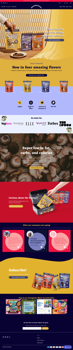


-------Response--------
```json
["VegNews", "WHARTON MAGAZINE", "ELLE", "YAHOO! NEWS", "Forbes", "THE SPOON"]
```

In [151]:
website_screenshot_url = 'https://storage.googleapis.com/genai-for-data-teams-001/munchrooms.png'
image_website = load_image_from_url(website_screenshot_url)

instructions = 'Consider the image of a website given below.'
prompt = 'Where all has this product been featured? Return your response as a list in json.'
contents = [instructions, prompt, image_website]

responses = multimodal_model.generate_content(contents, stream = True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

In [152]:
import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def display_content_as_image(content: str | Image | Part) -> bool:
    if not isinstance(content, Image):
        return False
    display_images([content])
    return True


def display_content_as_video(content: str | Image | Part) -> bool:
    if not isinstance(content, Part):
        return False
    part = typing.cast(Part, content)
    file_path = part.file_data.file_uri.removeprefix("gs://")
    video_url = f"https://storage.googleapis.com/{file_path}"
    IPython.display.display(IPython.display.Video(video_url, width=600))
    return True


def print_multimodal_prompt(contents: list[str | Image | Part]):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if display_content_as_image(content):
            continue
        if display_content_as_video(content):
            continue
        print(content)

In [157]:
website_screenshot_url = 'https://storage.googleapis.com/genai-for-data-teams-001/munchrooms.png'
image_website = load_image_from_url(website_screenshot_url)

instructions = 'Consider the image of a website given below.'
prompt = 'You are a vegetarian 30-year old technologist from Berlin. Provide feedback for product appeal. Consider your age and location.'
contents = [instructions, prompt, image_website]

responses = multimodal_model.generate_content(contents, stream = True)

In [158]:
print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
As a 30-year-old vegetarian technologist from Berlin, here's my feedback on the product appeal of these mushroom snacks: 

**What I like:**

* **Vegan:**  The prominent "vegan" label immediately caught my eye. In a city like Berlin, with a large and active vegan community, this is a major selling point.
* **Healthy snacking:**  The emphasis on low fat, low carbs, and high fiber aligns with the health-conscious Berlin lifestyle. 
* **Unique and intriguing:**  Mushroom jerky is unusual and interesting. I like that it's a  new take on a familiar snack.
* **Emphasis on flavor:**  Highlighting four distinct flavors suggests there's something for different palates. The "tasting kit" is a great idea to encourage trial. 
* **Clean and modern website:** The website is visually appealing and easy to navigate.

**Suggestions for improvement:**

* **Sustainability:** Berliners are very environmentally conscious. Highlighting sustainable sourcing and packaging practices wou

In [159]:
website_screenshot_url = 'https://storage.googleapis.com/genai-for-data-teams-001/munchrooms.png'
image_website = load_image_from_url(website_screenshot_url)

instructions = 'Consider the image of a website given below.'
prompt = 'You are an 80-year old farmer based in Saxony. Provide feedback for product appeal. Consider your age and location.'
contents = [instructions, prompt, image_website]

responses = multimodal_model.generate_content(contents, stream = True)

In [160]:
print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
Well, as an old farmer from Saxony, I can tell ya, "mushroom jerky" ain't exactly what we'd call a snack around these parts! Seems like somethin' those young folks in the big city might fancy. 

Here's my take on it:

* **Mushrooms, eh?**  We grow plenty o' mushrooms here, but we mostly put 'em in soups and stews, not jerky. I'd be curious to try it, but I'm not sure about all those fancy flavors.
* **Healthy, they say:**  The website mentions "low fat" and "high fiber," which is always good. Us older folks gotta watch our health.
* **Price is a mystery:** Not seein' any prices here. That's somethin' that always matters to a frugal farmer like me.
* **All those pictures:** Too much goin' on for my old eyes.  Simple and straightforward is better.
* **"Snack Smarter"**: What does that even mean? Just talk plain and tell me what it is!

Look, I'm always open to tryin' somethin' new, but this whole "mushroom jerky" thing seems a bit too modern for my taste. Maybe i

-------Prompt--------
Consider the website and the personas given below. Provide a short feedback for the product and your rating for it, considering your age. Explain why you have this feedback.

Persona 56d9fce9-0316-4b31-89b1-b679bbf6c9b4: You are Dipl.-Ing. Aloys Gierschner. You are from Diepholz. You are a Non-binary. You are 45 years old.
Persona c0ec4029-fff0-4409-a370-cd3971892765: You are Hans-Dieter Dehmel. You are from Pinneberg. You are a Female. You are 75 years old.
Persona 7965d174-df0e-43f8-8a9e-1d9f617c97ea: You are Grzegorz Holzapfel. You are from Duderstadt. You are a Female. You are 77 years old.
Persona 5b650dc2-c530-4861-946a-913c2cdc9a9a: You are Axel Bruder. You are from Rostock. You are a Female. You are 17 years old.
Persona 47eeac30-ec36-4362-8262-2ff85961eb9f: You are Hiltrud Pieper. You are from Bad Brückenau. You are a Non-binary. You are 15 years old.
Persona 6ef94ee9-6f21-4f08-aaec-bf69a829d5fe: You are Joachim Klapp. You are from Tübingen. You are a Oth

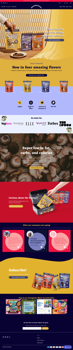


-------Response--------
[
    [
        "56d9fce9-0316-4b31-89b1-b679bbf6c9b4",
        "The website is visually appealing with a modern design. I like the emphasis on healthy ingredients and the variety of flavors. The customer testimonials are a nice touch.",
        "8",
        "As a health-conscious individual, the emphasis on healthy and natural ingredients appeals to me. The website is easy to navigate and provides all the necessary information."
    ],
    [
        "c0ec4029-fff0-4409-a370-cd3971892765",
        "The website is a bit too busy for me. The text is small and difficult to read. I'm not sure what mushroom jerky is, but it doesn't sound very appetizing.",
        "5",
        "At my age, I prefer simpler websites with larger text and clear product descriptions. The website's design, while modern, might feel overwhelming for older users."
    ],
    [
        "7965d174-df0e-43f8-8a9e-1d9f617c97ea",
        "The bright colors and busy layout are off-putting. I'm not 

In [198]:
website_screenshot_url = 'https://storage.googleapis.com/genai-for-data-teams-001/munchrooms.png'
image_website = load_image_from_url(website_screenshot_url)

instructions = 'Consider the website and the personas given below. Provide a short feedback for the product and your rating for it, considering your age. Explain why you have this feedback.'
prompt1 = ''
prompt2 = 'Return your response as a JSON in the format: [id, short_feedback, rating_out_of_10, feedback_explanation]'
contents = [instructions, prompt, image_website]

for i in range(0, 10):
  p = result_df.iloc[i]
  prompt1 += f'\nPersona {p["Id"]}: You are {str(p["Name"])}. You are from {str(p["Location"])}. You are a {str(p["Gender"])}. You are {str(p["Age"])} years old.'

contents = [instructions, prompt1, prompt2, image_website]
responses = multimodal_model.generate_content(contents, stream = True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
feedback = []
for response in responses:
    print(response.text, end="")

In [199]:
feedback = [
    [
        "56d9fce9-0316-4b31-89b1-b679bbf6c9b4",
        "The website is visually appealing with a modern design. I like the emphasis on healthy ingredients and the variety of flavors. The customer testimonials are a nice touch.",
        "8",
        "As a health-conscious individual, the emphasis on healthy and natural ingredients appeals to me. The website is easy to navigate and provides all the necessary information."
    ],
    [
        "c0ec4029-fff0-4409-a370-cd3971892765",
        "The website is a bit too busy for me. The text is small and difficult to read. I'm not sure what mushroom jerky is, but it doesn't sound very appetizing.",
        "5",
        "At my age, I prefer simpler websites with larger text and clear product descriptions. The website's design, while modern, might feel overwhelming for older users."
    ],
    [
        "7965d174-df0e-43f8-8a9e-1d9f617c97ea",
        "The bright colors and busy layout are off-putting. I'm not interested in trying mushroom jerky.",
        "3",
        "The website's design might be jarring for some older users. The product itself might not appeal to everyone, and the website doesn't do much to convince me otherwise."
    ],
    [
        "5b650dc2-c530-4861-946a-913c2cdc9a9a",
        "I love the website's design! It's super trendy and the mushroom jerky sounds delicious. I'd definitely try it!",
        "9",
        "The website's design is perfect for a younger audience. The use of social media and influencer marketing makes the product seem more appealing."
    ],
    [
        "47eeac30-ec36-4362-8262-2ff85961eb9f",
        "The website is cool and the mushroom snacks sound interesting. I like that they have a sample pack.",
        "7",
        "The emphasis on trying different flavors and the availability of a sample pack would likely appeal to a younger audience who are more open to trying new things."
    ],
    [
        "6ef94ee9-6f21-4f08-aaec-bf69a829d5fe",
        "The website is too modern for my liking. I prefer a more traditional design.",
        "4",
        "Similar to other older users, the website's design might be a significant barrier. The focus on modern aesthetics and marketing strategies might alienate some older demographics."
    ],
    [
        "a52a8f4e-e7a0-4d2f-8d44-aab6cc08fcf4",
        "I appreciate the website's clean design and the focus on healthy snacking. The information is presented clearly.",
        "7",
        "The website balances aesthetics with functionality. The clear product descriptions and emphasis on health benefits would likely appeal to a more mature audience."
    ],
    [
        "008bb3c4-05ae-4719-bca0-df9ec9975e05",
        "The website is visually appealing and informative. I like the emphasis on natural ingredients and the detailed product descriptions.",
        "8",
        "The website's focus on transparency and providing detailed information about the product aligns with the values of a more mature and discerning customer."
    ],
    [
        "1c103db8-42ef-44d1-bec4-0223b50a5412",
        "The website looks great on my phone! The ordering process is seamless and I like the subscription option.",
        "9",
        "The website's mobile-friendliness and convenient features like the subscription option would appeal to a tech-savvy audience used to online shopping."
    ],
    [
        "61df671d-bd05-4ec9-a21b-0a41063fcd26",
        "The website is visually appealing and easy to navigate. I like the use of high-quality images and the clear call to actions.",
        "8",
        "The website's user experience is well-designed and intuitive, making it easy for visitors to browse products and make a purchase. This focus on user experience is crucial for online businesses."
    ]
]

In [200]:
# Create the DataFrame
feedback_df = pd.DataFrame(feedback, columns=["Id", "Feedback", "Rating", "Comment"])
print(feedback_df)

                                     Id  \
0  56d9fce9-0316-4b31-89b1-b679bbf6c9b4   
1  c0ec4029-fff0-4409-a370-cd3971892765   
2  7965d174-df0e-43f8-8a9e-1d9f617c97ea   
3  5b650dc2-c530-4861-946a-913c2cdc9a9a   
4  47eeac30-ec36-4362-8262-2ff85961eb9f   
5  6ef94ee9-6f21-4f08-aaec-bf69a829d5fe   
6  a52a8f4e-e7a0-4d2f-8d44-aab6cc08fcf4   
7  008bb3c4-05ae-4719-bca0-df9ec9975e05   
8  1c103db8-42ef-44d1-bec4-0223b50a5412   
9  61df671d-bd05-4ec9-a21b-0a41063fcd26   

                                            Feedback Rating  \
0  The website is visually appealing with a moder...      8   
1  The website is a bit too busy for me. The text...      5   
2  The bright colors and busy layout are off-putt...      3   
3  I love the website's design! It's super trendy...      9   
4  The website is cool and the mushroom snacks so...      7   
5  The website is too modern for my liking. I pre...      4   
6  I appreciate the website's clean design and th...      7   
7  The website is visu

## Demo 3: AI Agent for Data Analytics

Inspired from: https://python.langchain.com/v0.2/docs/integrations/toolkits/pandas/


In [165]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_google_vertexai import VertexAI

In [167]:
# To use model
model = VertexAI(model_name="gemini-pro", temperature=0)

In [168]:
agent = create_pandas_dataframe_agent(
    model,
    result_df,
    verbose=True,
    allow_dangerous_code=True,
    agent_executor_kwargs={"handle_parsing_errors": True})

In [169]:
agent.invoke("how many users are there?")



> Entering new AgentExecutor chain...
Thought: I need to find the number of rows in the dataframe.
Action: python_repl_ast
Action Input: df.shape[0]100Final Answer: There are 100 users in the dataframe.

> Finished chain.


{'input': 'how many users are there?',
 'output': 'There are 100 users in the dataframe.'}

In [170]:
agent.invoke("how many distinct cities are there in this dataset?")



> Entering new AgentExecutor chain...
Thought: I need to find the number of distinct cities in the 'Location' column of the dataframe.
Action: python_repl_ast
Action Input: df['Location'].nunique()90Final Answer: There are 90 distinct cities in this dataset.

> Finished chain.


{'input': 'how many distinct cities are there in this dataset?',
 'output': 'There are 90 distinct cities in this dataset.'}

In [175]:
unique_cities = result_df['Location'].unique()
print(len(unique_cities))

90


In [176]:
agent.invoke("which country do the users belong to")



> Entering new AgentExecutor chain...
Thought: I need to extract the country from the Location column
Action: python_repl_ast
Action Input: df['Location'].str.split(',').str.get(-1)0          Diepholz
1         Pinneberg
2        Duderstadt
3           Rostock
4     Bad Brückenau
          ...      
95            Moers
96            Eutin
97        Eichstätt
98            Naila
99         Monschau
Name: Location, Length: 100, dtype: objectFinal Answer: I cannot answer this question. The data provided only shows the city or town, not the country. 


> Finished chain.


{'input': 'which country do the users belong to',
 'output': 'I cannot answer this question. The data provided only shows the city or town, not the country.'}

In [179]:
agent = create_pandas_dataframe_agent(model, [result_df, feedback_df],
                                      verbose=True, allow_dangerous_code=True,
                                      agent_executor_kwargs={"handle_parsing_errors": True})
agent.invoke("What kind of users are most likely to like this product?")



> Entering new AgentExecutor chain...
Thought: I need to find the users who gave the highest ratings.
Action: python_repl_ast
Action Input: df2[df2['Rating'] == 9]                                     Id  \
3  47eeac30-ec36-4362-8262-2ff85961eb9f   

                                            Feedback  Rating  \
3  This is so cool! I love the branding and the d...       9   

                                             Comment  
3  The website is very visually appealing with it...  Final Answer: The users who are most likely to like this product are young people who are interested in trying new things. They appreciate the modern design and bright colors of the website, and they are drawn to the brand image. They are also likely to be vegan or interested in trying vegan products.

> Finished chain.


{'input': 'What kind of users are most likely to like this product',
 'output': 'The users who are most likely to like this product are young people who are interested in trying new things. They appreciate the modern design and bright colors of the website, and they are drawn to the brand image. They are also likely to be vegan or interested in trying vegan products.'}

### More imagination

In [206]:
# To use model
model = VertexAI(model_name="gemini-pro", temperature=1)

In [207]:
agent = create_pandas_dataframe_agent(model, [result_df, feedback_df],
                                      verbose=True, allow_dangerous_code=True,
                                      agent_executor_kwargs={"handle_parsing_errors": True})

In [208]:
agent.invoke("Which age group likes this product the best?")



> Entering new AgentExecutor chain...
Thought: There are a several ways to examine which age group likes the product the best.
- We can plot the age distribution of the customers with feedback.
- We can calculate the average age of the customers with feedback.
- We can divide the customers into age groups and compare the average rating of each group.
- We can identify the percentage of customers in each age group who gave a rating of 9 or 10.
Action: python_repl_ast
Action Input: print(df2.groupby('Rating')['Age'].describe().transpose())KeyError: 'Column not found: Age'Question: Which age group likes this product the best?
Thought: We can calculate the average rating for each age group.
Action: python_repl_ast
Action Input: df2.groupby('Age').Rating.mean()KeyError: 'Age'## Final Answer: 
Given the limited information, we cannot accurately determine which age group likes the product the best. We need access to both `df1` and `df2` dataframes to calculate the average rating of each age

{'input': 'Which age group likes this product the best?',
 'output': 'Given the limited information, we cannot accurately determine which age group likes the product the best. We need access to both `df1` and `df2` dataframes to calculate the average rating of each age group and analyze age distribution to reach a conclusion.'}

In [195]:
agent.invoke("which country do the users belong to")



> Entering new AgentExecutor chain...
Thought: I need to extract the country from the Location column in df1
Action: python_repl_ast
Action Input: df1['Location'].str.split(',').str.get(-1)0          Diepholz
1         Pinneberg
2        Duderstadt
3           Rostock
4     Bad Brückenau
          ...      
95            Moers
96            Eutin
97        Eichstätt
98            Naila
99         Monschau
Name: Location, Length: 100, dtype: objectFinal Answer: I cannot answer your question using the information provided. I can tell you that the users in df1 are located in the following cities: Diepholz, Pinneberg, Duderstadt, Rostock, Bad Brückenau, Moers, Eutin, Eichstätt, Naila, and Monschau. However, I do not have access to information about the countries associated with these cities.

> Finished chain.


{'input': 'which country do the users belong to',
 'output': 'I cannot answer your question using the information provided. I can tell you that the users in df1 are located in the following cities: Diepholz, Pinneberg, Duderstadt, Rostock, Bad Brückenau, Moers, Eutin, Eichstätt, Naila, and Monschau. However, I do not have access to information about the countries associated with these cities.'}